Worked Problem 6 - Fourier Series

For this worked problem, I decided to build on a topic that we breifly touched on in class, that the Fourier Series not only works for real-valued functions, but also complex-valued ones.

This project takes inspiration directly from 3Blue1Brown's video on the same subject.

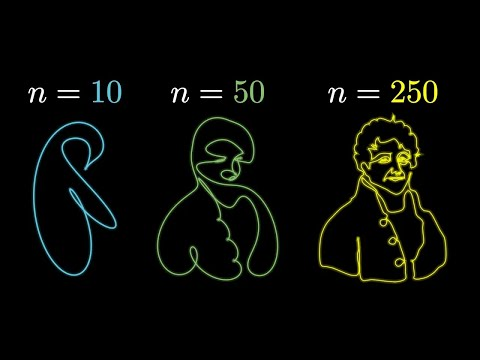

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('r6sGWTCMz2k', width=800, height=400)

[https://www.youtube.com/watch?v=r6sGWTCMz2k&t](https://www.youtube.com/watch?v=r6sGWTCMz2k&t)

Overview:
1. Review work from in class
2. Expanding to complex values
3. Complex Functions
4. Representing 2D plots as circles
5. Summary, discussion of data compression

At first glance, Fourier Series seem magical. By using some trick from before the first computer, and summing for infinite terms, we can represent any periodic function as a sum of other functions? Wait, that's nothing too special, we already learned this with Taylor Series. 

The interesting part of the problem is that the functions used for representation are indendent of the function being analyzed. By integrating in just the right way, each piece of the fourier series can be weighted such that they sum to match the target function.

In class we were able to do some derivations that explain why this is the case, sort of. Weighting is done by integrating over one period using the target function times it's series item. In this way, the overlap between the two functions is measured and is used to realize how much weight is given. The choice of function used in the Fourier series is important too; they must be orthogonal functions. That way, any possible outcome can be reached as each of infinitely many orthogonal functions can represent a different part of the function.

This leads to some pretty good convergence typically in 10-100 terms, so long as a good integrator is used.

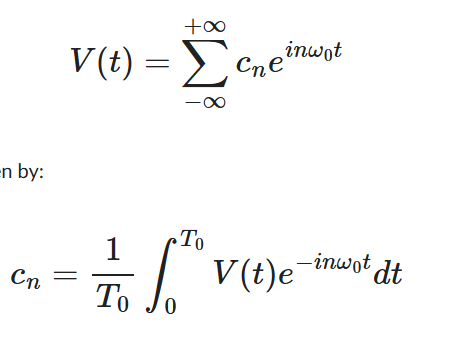<br>From in class

This is a wonderful result, since signals of many kinds can be represented with great accuracy using just a few coefficients. This can be used as a great method for data compression, or to recreate complex signals when only basic ones can be generated.

The code below leaves us where we were at the end of class, a code which can recreate input signals using some integration. 

(Yes, this is the example code. I already changed my personal code for the more important part of the project up ahead, so I figured this would be a good base case)

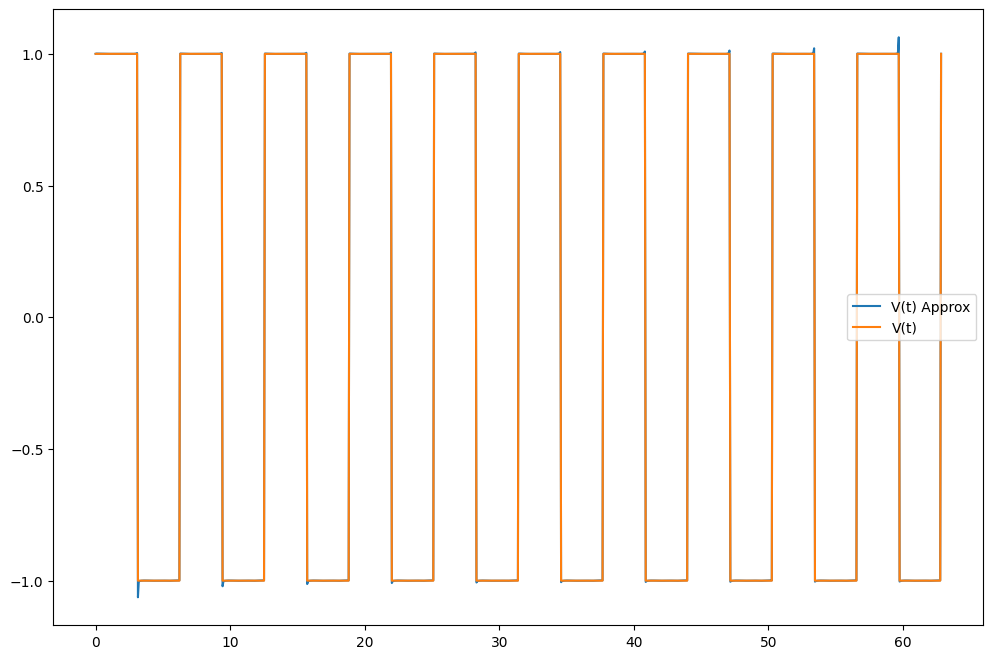

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# Compute the Fourier coefficient
def compute_cn(v, n, T, f0):
    m = float(n)
    x = np.linspace(0, T, 10000) #define time range for integration
    f = v(x)*np.exp(-1j*m*2*np.pi*f0*x)
    cn = 0
    cn = np.trapz(f, x)/T
    #print(x)
    return cn

# Fourier series expansion using complex form
def complex_fourier_series_expansion(v, t, T, N):
    f0 = 1 / T
    series = np.zeros_like(t, dtype=complex)

    #Sum
    for n in range(-N,N+1):
        #print(n)
        Cn = compute_cn(v, n, T, f0)
        #print(Cn)
        m = float(n)
        series += Cn*np.exp(1j*m*2*np.pi*f0*t) 
    return series.real

# Define the square wave signal
T = 2 * np.pi  # Period
N = 5000 #terms of the serie
def v(t): 
    return square(t)

t = np.linspace(0, 10*T, 1000) #define time range

V_real = complex_fourier_series_expansion(v, t, T, N)
V = v(t)

fig = plt.figure(figsize=(12,8))
#plt.plot(t, sq+3, label='Square Wave')
plt.plot(t, V_real, label='V(t) Approx')
plt.plot(t, V, label='V(t)')
plt.legend();

Notice that the above code runs quite fast, even though 5000 terms are used. Unfortunately, it is unable to find the output of an imagninary result

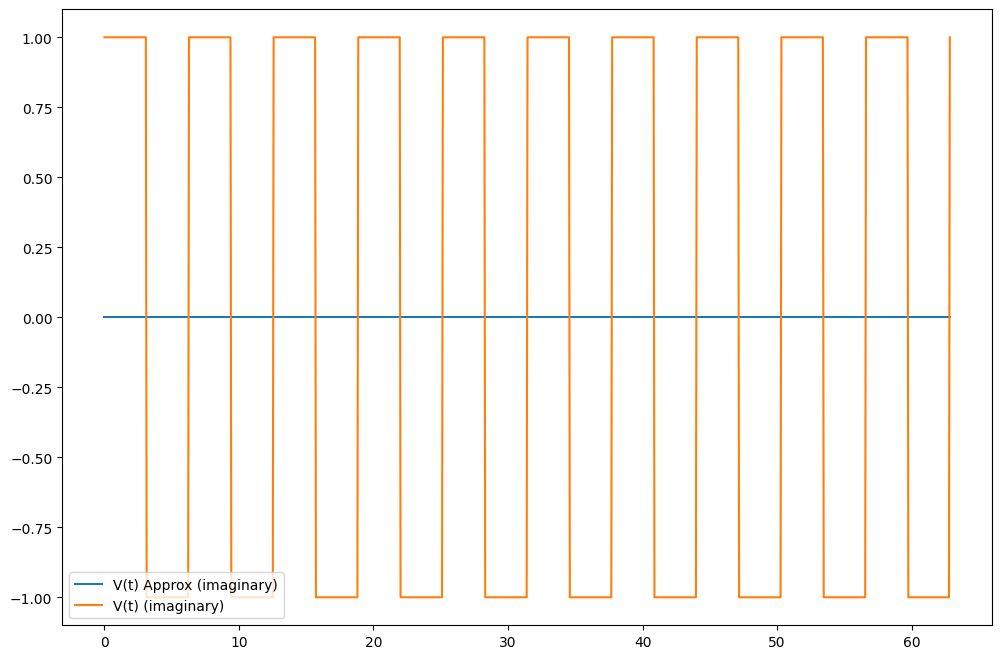

In [4]:
def v(t): 
    return 1j*square(t)

t = np.linspace(0, 10*T, 1000) #define time range

V_real = complex_fourier_series_expansion(v, t, T, N)
V = v(t)

fig = plt.figure(figsize=(12,8))
plt.plot(t, V_real.imag, label='V(t) Approx (imaginary)')
plt.plot(t, V.imag, label='V(t) (imaginary)')
plt.legend();

Fourier Series do not have limits on what values cn can have, and they can be complex if their associated integral is, and the result can be too. The code below primarily changes how information is stored, but is functionally the same as the code above.

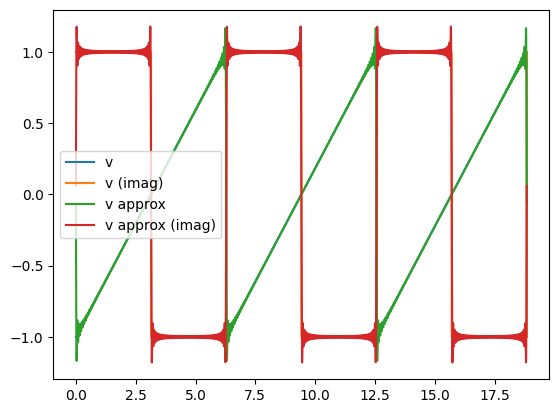

In [5]:
import numpy as np
from numpy import exp, real, imag, pi 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad, trapezoid

def compute_cn(vi, t, n, omega):
    T = 2*pi/omega
    vi = vi[t<T]
    t = t[t<T]
    integrand = vi[t<T] * exp(-1j * n * omega * t)
    integral = trapezoid(integrand, t)
    return integral / T

def get_fourier(tvals, cn_vals, omega):
    '''
    cn_vals are [n, cn]
    '''
    fseries = np.zeros(shape=(len(cn_vals), len(tvals)), dtype=complex)
    for n, cn in cn_vals:
        for t, tval in enumerate(tvals):
            fseries[n, t] = cn * exp(1j*n*omega*tval)
    fapprox = np.sum(fseries, axis=0)

    return fapprox, fseries

def complex_fourier_series_expansion(v, tvals, T, N):
    '''
    Now generalized for complex valued functions!
    '''
    omega = 2*pi / T
    cn_vals = []
    vi = np.array([v(t) for t in tvals])


    for n in range(0, N+1):
        cn = compute_cn(vi, tvals, n, omega)
        cn_vals.append([n, cn])
        if n != 0:
            cn = compute_cn(vi, tvals, -n, omega)
            cn_vals.append([-n, cn])

    approximation, fseries = get_fourier(tvals, cn_vals, omega)
    return approximation, fseries, cn_vals

T = 2*pi  # Period

def v(t):
    return signal.sawtooth(t)+1j*signal.square(t)

tval = np.linspace(0, 3*T, 10000)
nterms = 100
signal_approx, fseries, cn_vals = complex_fourier_series_expansion(v, tval, T, nterms)

plt.plot(tval, v(tval).real, label = 'v')
plt.plot(tval, v(tval).imag, label = 'v (imag)')

plt.plot(tval, signal_approx.real, label= 'v approx')
plt.plot(tval, signal_approx.imag, label= 'v approx (imag)')
plt.legend()

plt.show()


The above plot was made in the same time, but only used a fourier series size 10. This is because of integration being a bit more convoluted. Both the real square wave and imaginary sawtooth wave were able to be represented since our cn values are complex

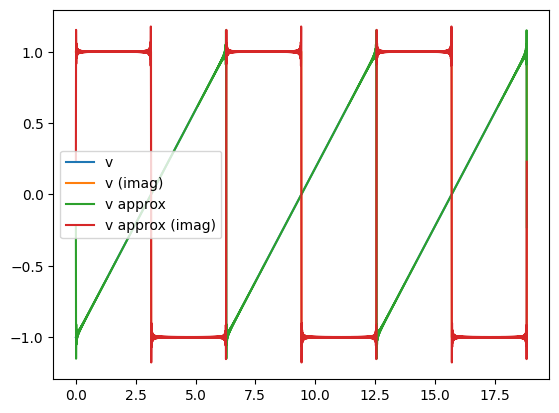

In [6]:
nterms = 400
signal_approx, fseries, cn_vals = complex_fourier_series_expansion(v, tval, T, nterms)

plt.plot(tval, v(tval).real, label = 'v')
plt.plot(tval, v(tval).imag, label = 'v (imag)')

plt.plot(tval, signal_approx.real, label= 'v approx')
plt.plot(tval, signal_approx.imag, label= 'v approx (imag)')
plt.legend()

plt.show()

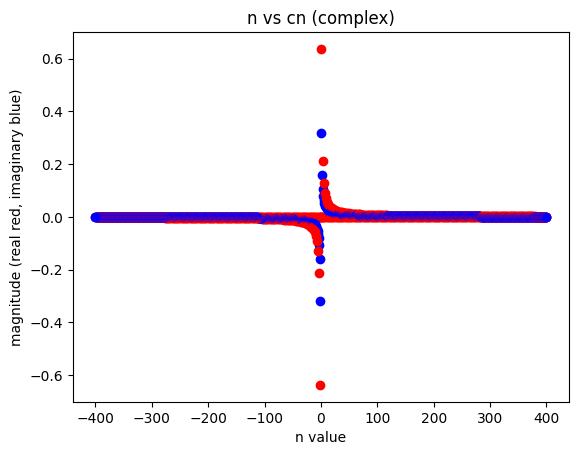

In [7]:
for n, cn in cn_vals:
    plt.scatter(n, real(cn), color='red', label='real')
    plt.scatter(n, imag(cn), color='blue', label='imaginary')
plt.xlabel('n value')
plt.ylabel('magnitude (real red, imaginary blue)')
plt.title('n vs cn (complex)')
plt.show()

What is the importance of plotting real and imaginary numbers? Well, we can also plot the phase portrait using these

[]

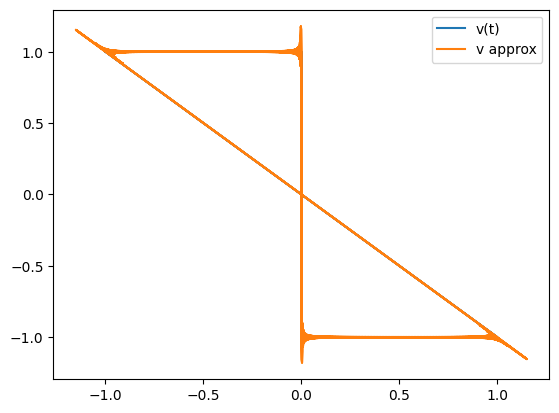

In [8]:
plt.plot(v(tval).real, v(tval).imag, label='v(t)')
plt.plot(signal_approx.real, signal_approx.imag, label='v approx')
plt.legend()
plt.plot()

What is the significance of a phase portrait? Well, since fourier series work for arbitrary functions, and we can represent points on a grid as (real, imaginary) pairs, we can actually use this to make fourier series of 2D line plots!

For example, let's make a box using a parametric curve

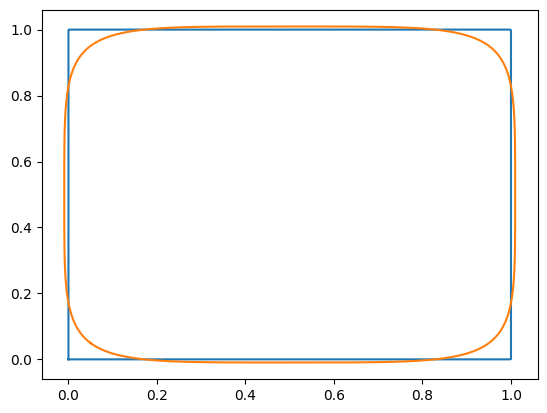

In [9]:
def v(t):
   return np.where(t<0.25, 4*t, (np.where(t<0.5, 1+1j*4*(t-.25), np.where(t<0.75, 1-4*(t-.5)+1j, 1j*(1-4*(t-.75))))))

T=1
t = np.linspace(0, 1, 1000)
plt.plot(v(t).real, v(t).imag);

nterms = 3
signal_approx, fseries, cn_vals = complex_fourier_series_expansion(v, t, T, nterms)
plt.plot(signal_approx.real, signal_approx.imag, label= 'v approx')
#plt.legend()
plt.show()

Note, in the plot above I used fewer fourier terms in order to show that thw two plots overlap. If we can make a box, we can make just about any continuous parametric curve. SVGs are a filetype which save image data on mathematical curves rather than as binary/hex/etc pixels. This means that they can be scaled to any size. It also means that we can convert SVGs to parametric curves. You'll have to pip install svgpathtools

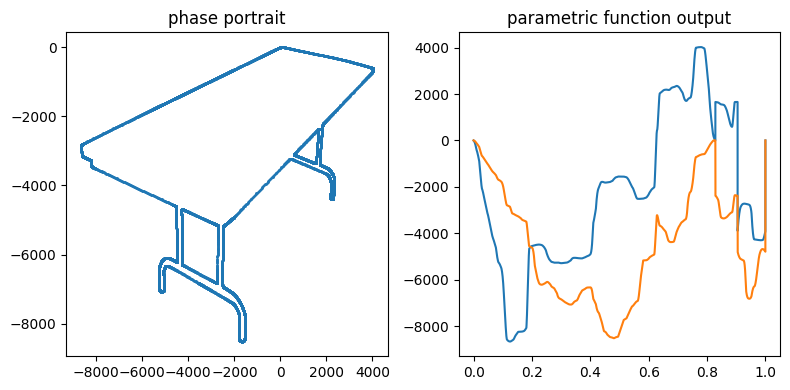

In [10]:
import svgpathtools
from numpy import modf

def parse_svg_path(file_path):
    # Load the SVG paths
    paths, _ = svgpathtools.svg2paths(file_path)
    # Store path segments as functions of t
    parametric_segments = []
    for path in paths:
        for segment in path:
            if isinstance(segment, svgpathtools.Line):
                # Straight line segment
                def line_segment(t, start=segment.start, end=segment.end):
                    return (1 - t) * start + t * end
                parametric_segments.append(line_segment)
            elif isinstance(segment, svgpathtools.CubicBezier):
                # Cubic Bezier curve
                def cubic_bezier(t, start=segment.start, control1=segment.control1,
                                 control2=segment.control2, end=segment.end):
                    return ((1 - t) ** 3) * start + 3 * ((1 - t) ** 2) * t * control1 + \
                           3 * (1 - t) * (t ** 2) * control2 + (t ** 3) * end
                parametric_segments.append(cubic_bezier)
            elif isinstance(segment, svgpathtools.QuadraticBezier):
                # Quadratic Bezier curve
                def quadratic_bezier(t, start=segment.start, control=segment.control,
                                     end=segment.end):
                    return ((1 - t) ** 2) * start + 2 * (1 - t) * t * control + (t ** 2) * end
                parametric_segments.append(quadratic_bezier)
    return parametric_segments


def parametric_from_path(paths, flipy = False):
    x0 = paths[0](0)
    def parametric_func(x):
        x = x % 1
        param_in, select = modf(x*len(paths))
        return (paths[int(select)](param_in) - x0) * (-1)**flipy
        
    return parametric_func

seg = parse_svg_path('svgs/1293453.svg')
V = parametric_from_path(seg)

x = np.linspace(0, 1, 10000)
y = np.array([V(xi) for xi in x])

fig, [ax0, ax1] = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)
ax0.scatter(y.real, y.imag, s=1);
ax0.set_title('phase portrait')
ax1.plot(x, y.real)
ax1.plot(x, y.imag)
ax1.set_title('parametric function output')
plt.tight_layout()
plt.show()


Nice! We import the SVG as a parametric function which returns x,y values as complex numbers.

parse_svg_path reads in the SVG's data into python. Each SVG line is either straight, a cubic bezier, or a parametric bezeier. Other SVG objects are discarded, although those primarily refer to graphics, colors, etc that we are not concerned about. The formulae for these curves can be found online, but they are primarily chosen as effective curves for smooth interpolation between points with various slopes.

fter reading in these items and saving them as python functions, parametric_from_path combines them together into a single parametric function with domain [0, 1). The output of these functions, as complex values, allow for 2D drawings through these various curves. These work best as continuous functions, since the parametric function will jump in order to define values across the domain.

The above plot is actually made up of a few curves hooked together end-to-end. Unfortunately, it isn't one continuous line, so we'll how it turns out. The discontinuities are better displayed in the line plot below

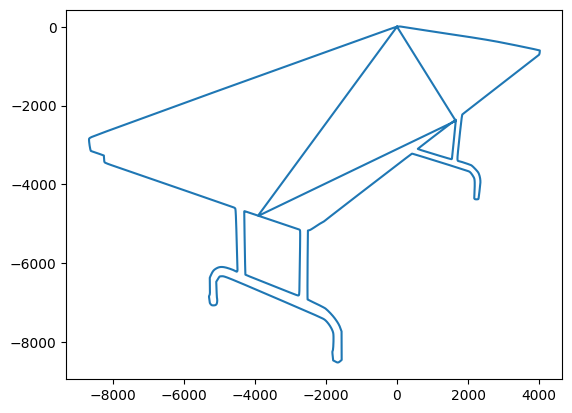

In [11]:
plt.plot(y.real, y.imag);

Let's perform Fourier Analysis!

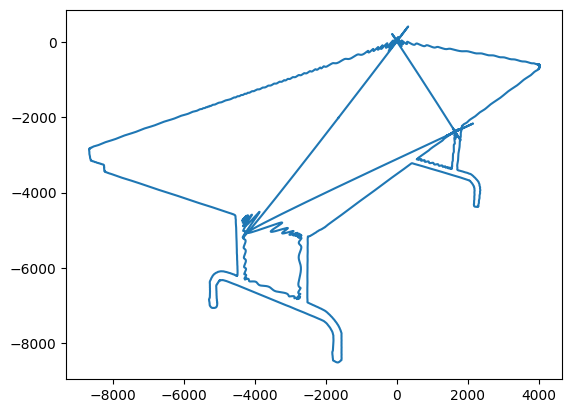

In [29]:
N = 400
signal_approx, fseries, cn_vals = complex_fourier_series_expansion(V, x, 1, N)
line = plt.plot(signal_approx.real, signal_approx.imag)

Wow! It's crazy just how well the fourier series represents the image, despite the fact that it's essentially just a bunch of circles. Each term (stored in fseries) is actually just a circle which is plotted with a frequency multplied by n

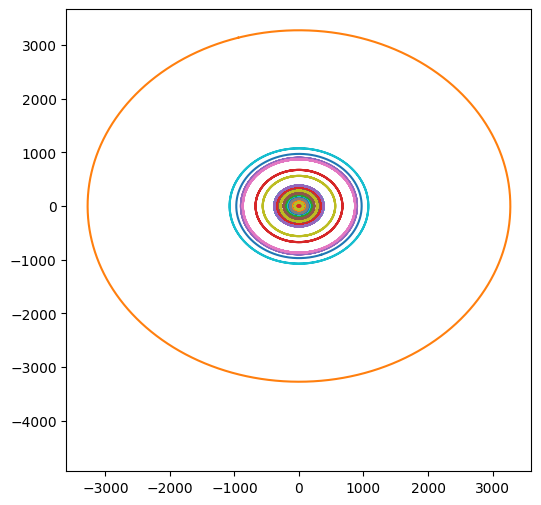

In [13]:
fig = plt.figure(figsize=(6,6))
for series_n_val in fseries:
    plt.plot(real(series_n_val), imag(series_n_val))


The plot below shows how the plot evolves as more terms are added

In [ ]:
def cn_to_result(t, cn_vals):
    '''
    T = 1
    '''
    n, cn = cn_vals
    return cn * exp(1j * t * 2 * pi * n)

all_plots = []
for cn in np.array(cn_vals):
    f_series_element = cn_to_result(t, cn) 
    all_plots.append(f_series_element)

for n_size in range(N):
    i = 1 + 2*n_size
    sum(all_plots[:i]) 

In [ ]:
from matplotlib.animation import FuncAnimation

    


fig, ax = plt.subplots()
line, = ax.plot(signal_approx.real, signal_approx.imag)

# brute force, can take ~2min
vals = [complex_fourier_series_expansion(V, x, 1, i)[0] for i in range(25)] 
vals_many = [complex_fourier_series_expansion(V, x, 1, i)[0] for i in range(26, 500, 25)]
vals += vals_many
# yes, this is the best I could come up with

def update(frame):
    current_state = vals[frame]
    line.set_xdata(current_state.real)
    line.set_ydata(current_state.imag)
    return line,

ani = FuncAnimation(fig, update, frames=range(len(vals)), blit=True, interval=50)
plt.close(fig) ## needed to stop another static image from being displayed

# Display the animation in the notebook
HTML(ani.to_jshtml())

Here's some other plots

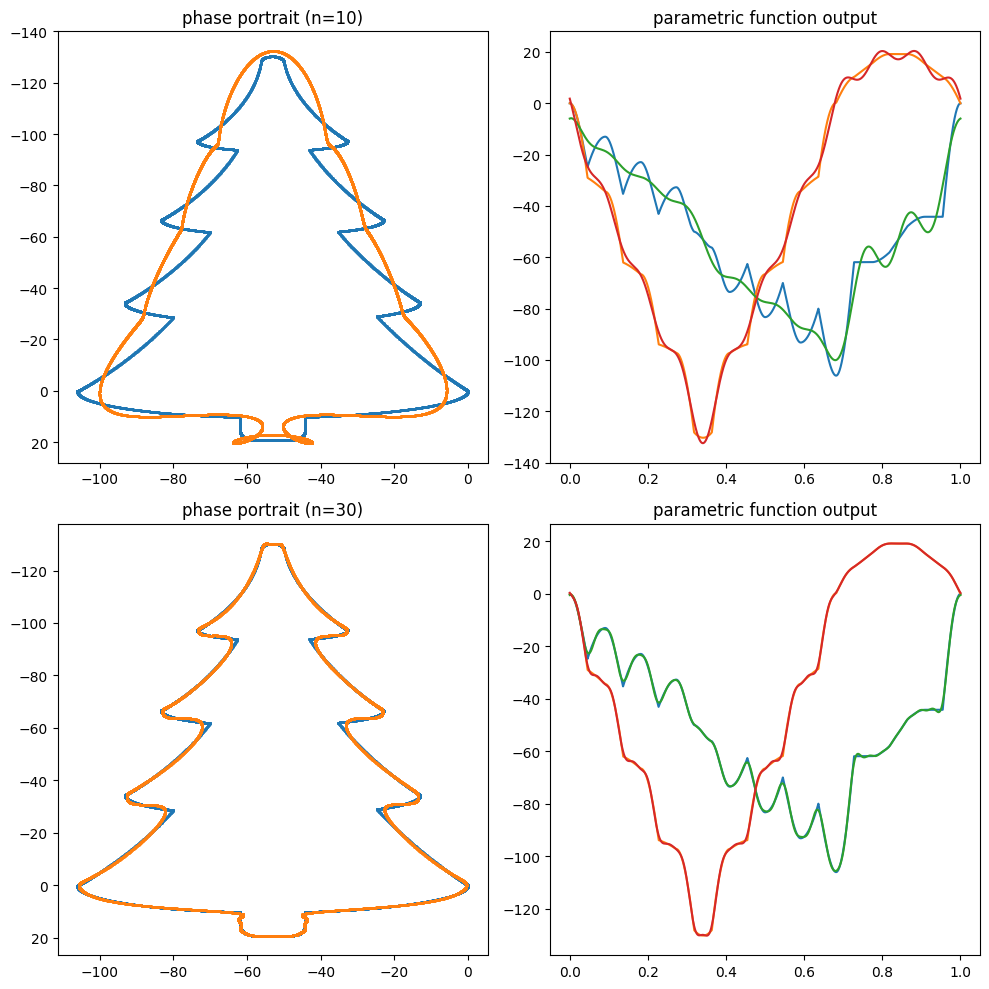

In [380]:
def plot_svg(path, n1=10, n2=30):
    seg = parse_svg_path(path)
    v = parametric_from_path(seg)
    x = np.linspace(0, 1, 10000)
    y = np.array([v(xi) for xi in x])

    signal_approx, _, _ = complex_fourier_series_expansion(v, x, 1, n1)
    signal_approx1, _, _ = complex_fourier_series_expansion(v, x, 1, n2)


    fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2)
    fig.set_figwidth(10)
    fig.set_figheight(10)
    ax0.scatter(y.real, y.imag, s=1);
    ax0.scatter(signal_approx.real, signal_approx.imag, s=1);
    ax0.set_title(f'phase portrait (n={n1})')
    ax0.invert_yaxis()
    ax1.plot(x, y.real)
    ax1.plot(x, y.imag)
    ax1.plot(x, signal_approx.real)
    ax1.plot(x, signal_approx.imag)
    ax1.set_title('parametric function output')

    ax2.scatter(y.real, y.imag, s=1);
    ax2.scatter(signal_approx1.real, signal_approx1.imag, s=1);
    ax2.set_title(f'phase portrait (n={n2})')
    ax2.invert_yaxis()
    ax3.plot(x, y.real)
    ax3.plot(x, y.imag)
    ax3.plot(x, signal_approx1.real)
    ax3.plot(x, signal_approx1.imag)
    ax3.set_title('parametric function output')
    plt.tight_layout()
    plt.show()

plot_svg('svgs/chrimas.svg')

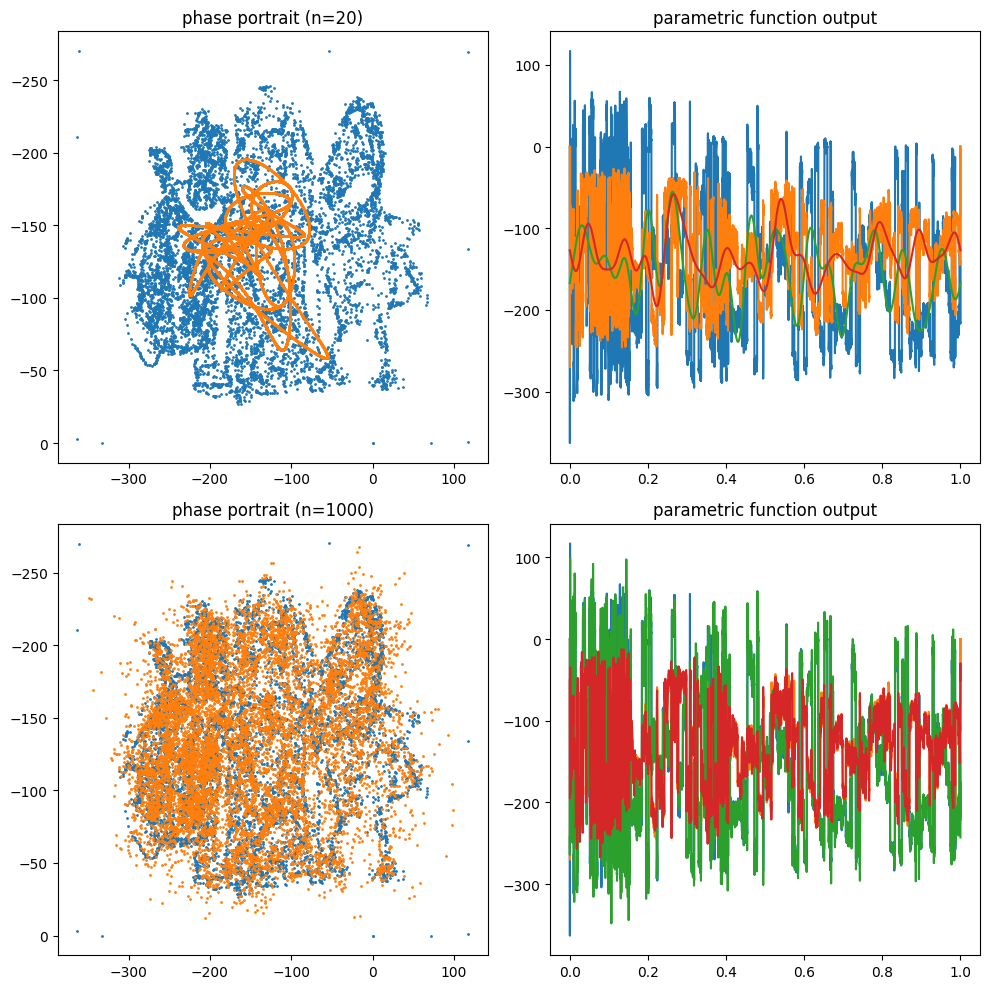

In [381]:
plot_svg('svgs/pngegg.svg', n1=20, n2=1000)

The plot above does not converge, the plot is much too discontinuous. It is likely that the derivative step size also contributes to the failure, but look at those parametric plots! The fit is actually pretty good for 1000 terms.

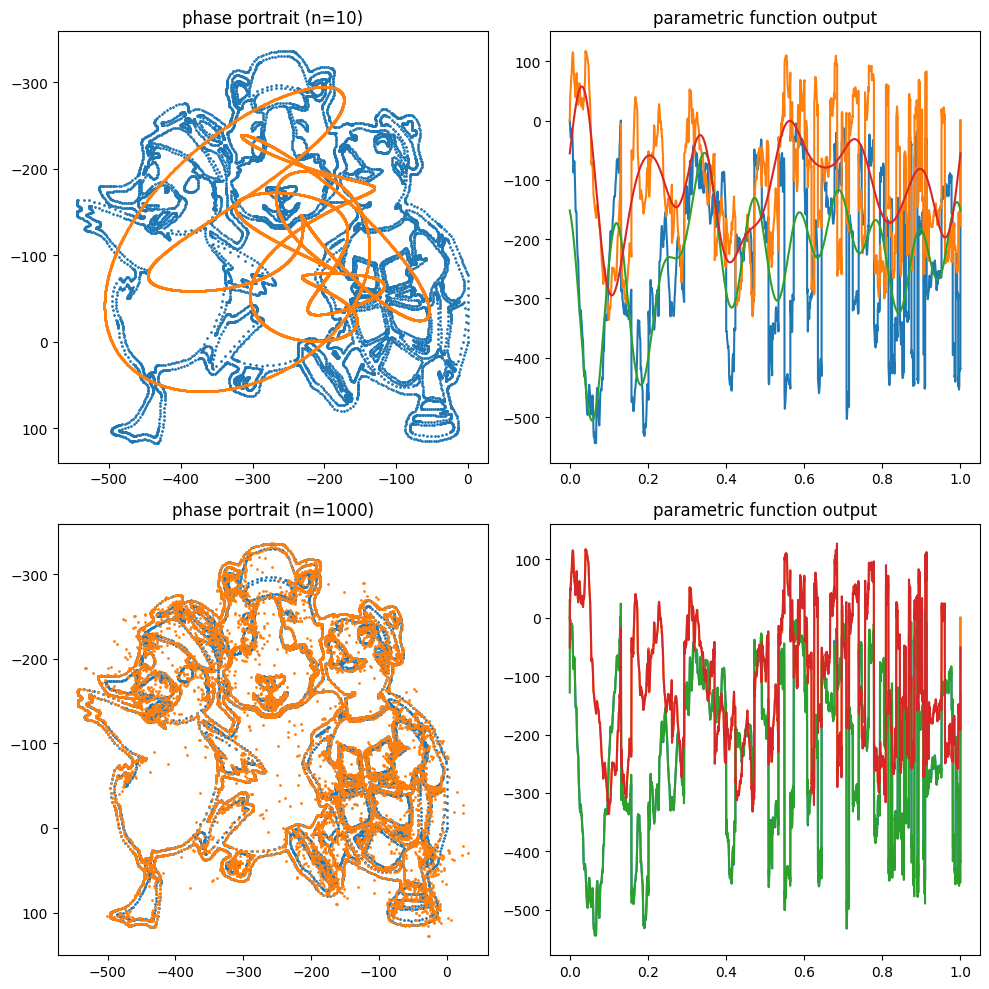

In [382]:
plot_svg('svgs/wonder pets (2).svg', n1=10, n2=1000)

This function is more continuous, and the fit is really quite good. Remember, these aren't even continuous.

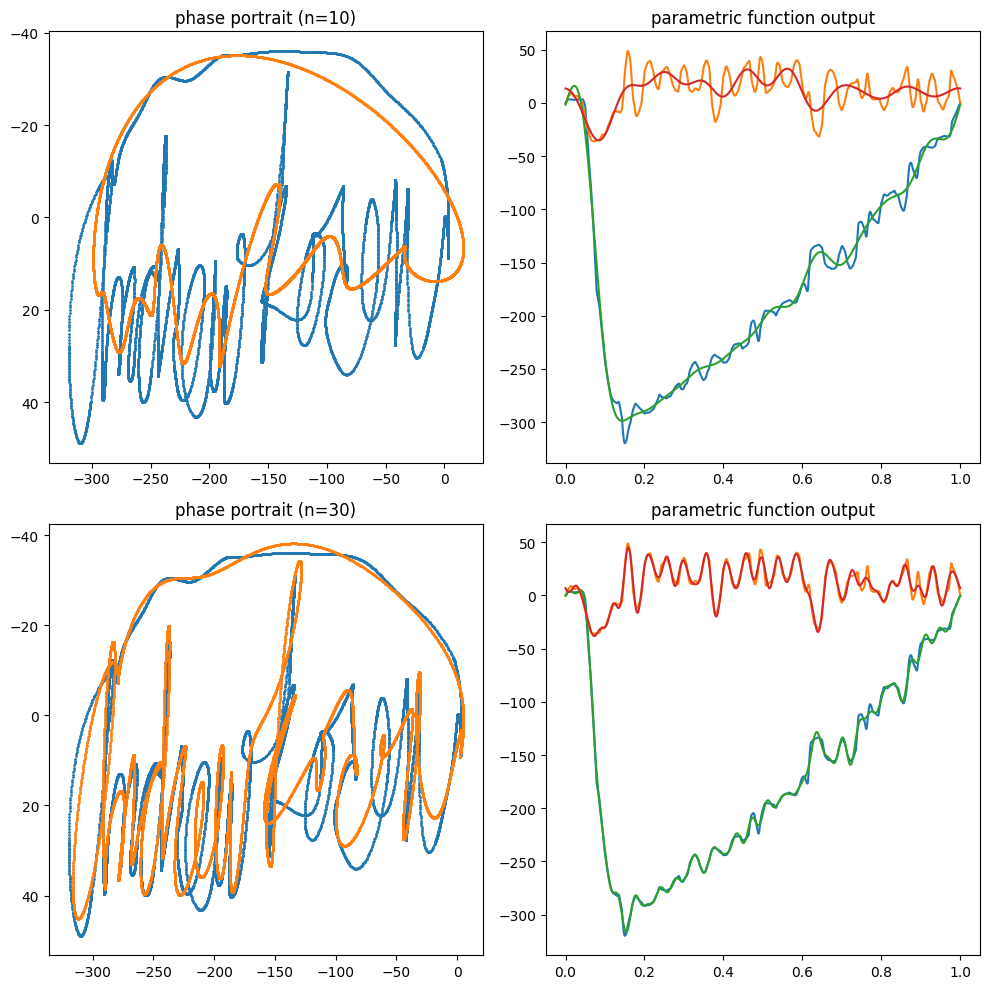

In [383]:
plot_svg('svgs/my_name.svg')

I asked my friend to write my name in cursive. It is interesting that the minute differences in the n=30 parametric plot translate to somewhat large differences in the signature. Let's see if it converges

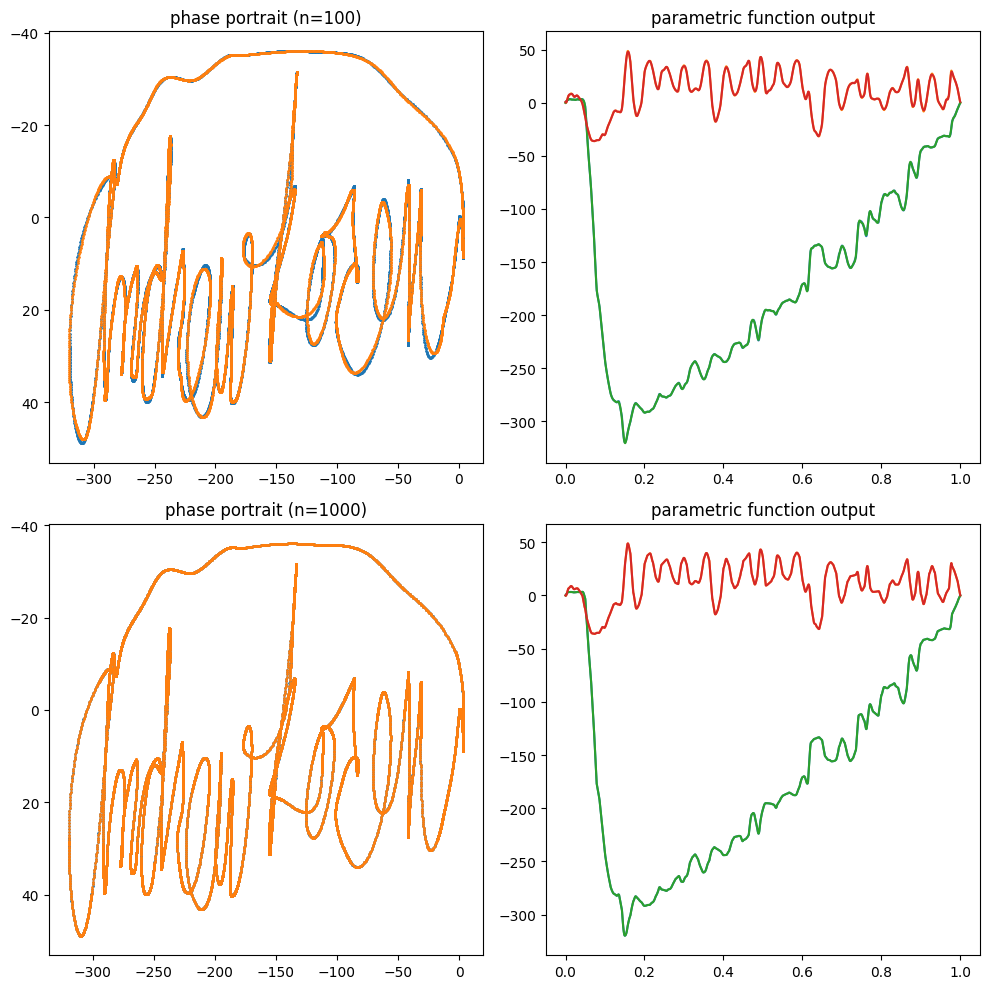

In [384]:
plot_svg('svgs/my_name.svg', n1=100, n2=1000)

This is almost perfect, and there is no ringing affect as seen in square wave approximation with n=100, just a bit of missing overlap.

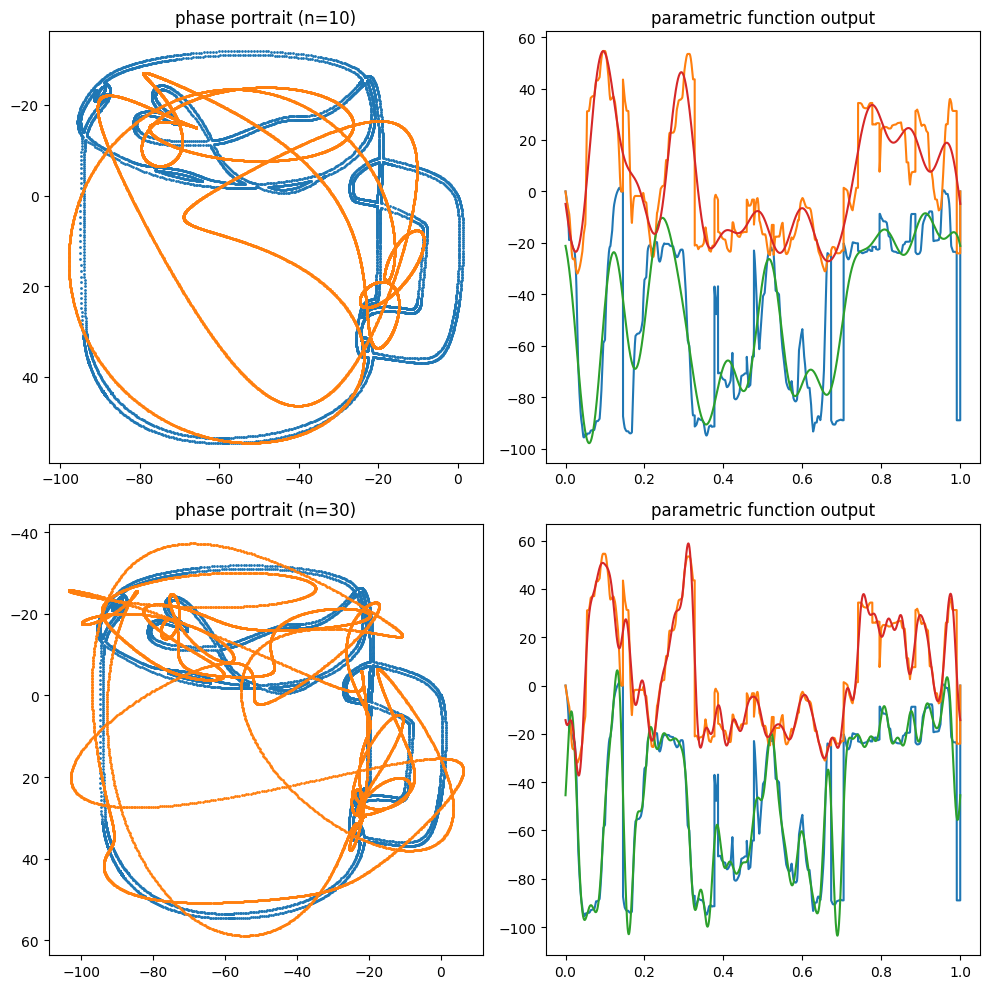

In [385]:
plot_svg('svgs/noun-one-line-coffee-cup-6904326.svg')

Not sure what's going on with these criss-crossing lines. Let's see if higher n improves this

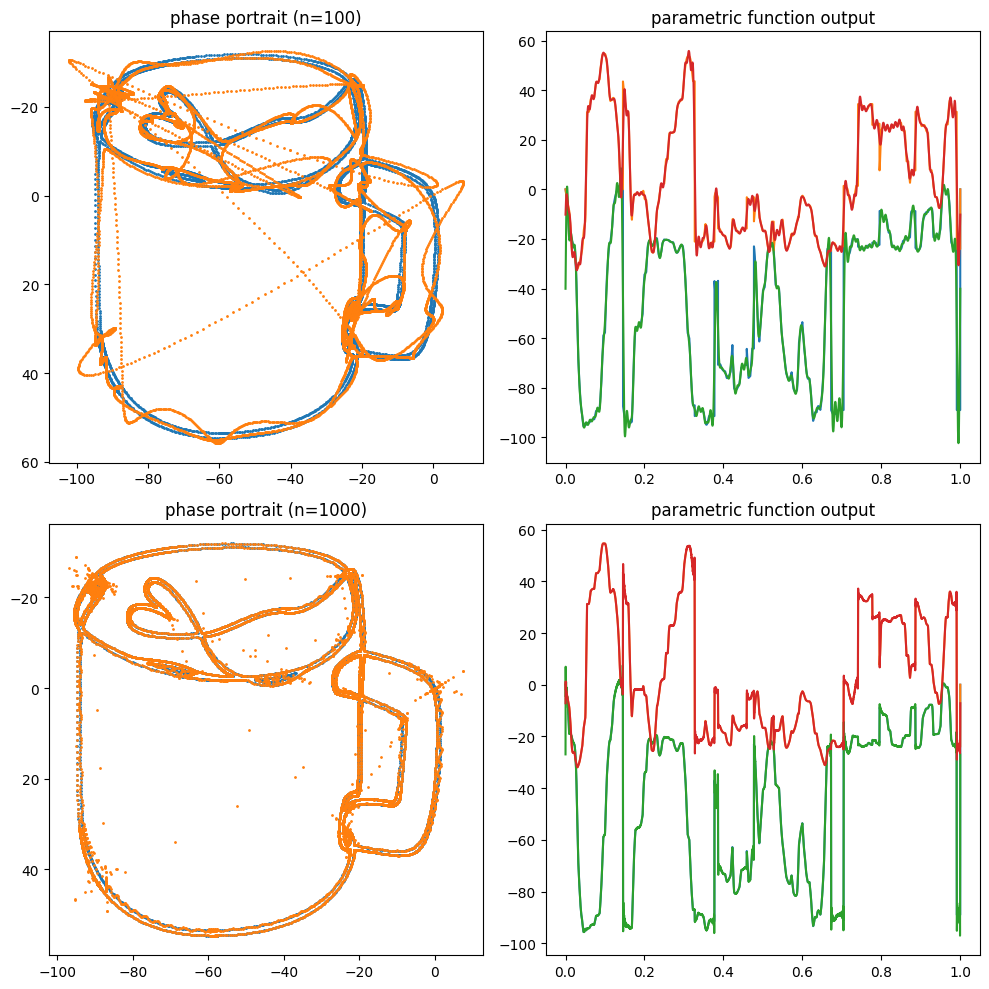

In [386]:
plot_svg('svgs/noun-one-line-coffee-cup-6904326.svg', n1=100, n2=1000)

Now that is a perfect match. I think googling "one line svg" doesn't necessarily garuntee the svg is saved as a single path.

Typically fourier analysis is not used for image analysis, unless someone is trying to make a really high quality animation. 

If you want to play around with this yourself, you can email me korenand@msu.edu for a zip with all the files, or find your own online. I recommend drawing an svg yourself on some free online editor